### Implementing Linear Regression

### sklearn.linear_model.Linear_Regression

#### Ordinary least squares Linear Regression.

LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

#### Parameters: 

fit_interceptbool, default=True
Whether to calculate the intercept for this model. If set to False, no intercept will be used in calculations (i.e. data is expected to be centered).

normalizebool, default=False
This parameter is ignored when fit_intercept is set to False. If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm. If you wish to standardize, please use StandardScaler before calling fit on an estimator with normalize=False.

Deprecated since version 1.0: normalize was deprecated in version 1.0 and will be removed in 1.2.

copy_Xbool, default=True
If True, X will be copied; else, it may be overwritten.

n_jobsint, default=None
The number of jobs to use for the computation. This will only provide speedup in case of sufficiently large problems, that is if firstly n_targets > 1 and secondly X is sparse or if positive is set to True. None means 1 unless in a joblib.parallel_backend context.

positivebool, default=False
When set to True, forces the coefficients to be positive. This option is only supported for dense arrays.


In [4]:
### Implementation of OLS

### importing libraries

import numpy as np
from sklearn.linear_model import LinearRegression

X = np.array([[1,1], [2,3], [3,4], [4, 6]])
y = np.dot(X, np.array([1,2])) + 3
reg = LinearRegression().fit(X,y)
reg.score(X,y)


1.0

In [7]:
reg.coef_

array([1., 2.])

In [8]:
reg.intercept_

2.9999999999999964

In [10]:
reg.predict(np.array([[5,6]]))

array([20.])

In [11]:
reg.get_params(deep = True)

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

### Implementing Ridge regression

Linear least squares with l2 regularization

Minimizes the objectives function: ||y - Xw||^2_2 + alpha * ||w||^2_2

Parameters:

alpha{float, ndarray of shape (n_targets,)}, default=1.0
Constant that multiplies the L2 term, controlling regularization strength. alpha must be a non-negative float i.e. in [0, inf).

When alpha = 0, the objective is equivalent to ordinary least squares, solved by the LinearRegression object. For numerical reasons, using alpha = 0 with the Ridge object is not advised. Instead, you should use the LinearRegression object.

fit_interceptbool, default=True Whether to calculate the intercept for this model. If set to False, no intercept will be used in calculations (i.e. data is expected to be centered).

normalizebool, default=False This parameter is ignored when fit_intercept is set to False. If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm. If you wish to standardize, please use StandardScaler before calling fit on an estimator with normalize=False.

Deprecated since version 1.0: normalize was deprecated in version 1.0 and will be removed in 1.2.

copy_Xbool, default=True If True, X will be copied; else, it may be overwritten.

n_jobsint, default=None The number of jobs to use for the computation. This will only provide speedup in case of sufficiently large problems, that is if firstly n_targets > 1 and secondly X is sparse or if positive is set to True. None means 1 unless in a joblib.parallel_backend context.

positivebool, default=False When set to True, forces the coefficients to be positive. This option is only supported for dense arrays.



In [18]:
import numpy as np
from sklearn.linear_model import Ridge
ran = np.random.RandomState(0)

number_Of_Samples, number_Of_Features = 10, 5
y = ran.randn(number_Of_Samples)
X = ran.randn(number_Of_Samples, number_Of_Features)

clx = Ridge(alpha = 1.0).fit(X,y)


In [19]:
clx.score(X,y)

0.6836781050289735

In [20]:
Ridge()

Ridge()

In [21]:
clx.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

### Implementing Lasso Regression

Linear Model trained with L1 prior as regularizer (aka the Lasso).

The optimization objective for Lasso is:

(1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1

In [22]:
import numpy as np
from sklearn.linear_model import Lasso

rng = np.random.RandomState(0)
number_Of_Samples, number_of_features = 10, 5

X = rng.randn(number_Of_Samples, number_of_features)
y = rng.randn(number_Of_Samples)

clf = Lasso(alpha = 1.0).fit(X,y)

clf.coef_

array([-0.,  0.,  0., -0.,  0.])

In [23]:
clf.intercept_

-0.2427925882379088

In [24]:
print(clf.coef_)

[-0.  0.  0. -0.  0.]


### Implementing ElasticNet

Linear regression with combined L1 and L2 priors as regularizer.

Minimizes the objective function:

1 / (2 * n_samples) * ||y - Xw||^2_2
+ alpha * l1_ratio * ||w||_1
+ 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2
If you are interested in controlling the L1 and L2 penalty separately, keep in mind that this is equivalent to:

a * ||w||_1 + 0.5 * b * ||w||_2^2
where:

alpha = a + b and l1_ratio = a / (a + b)

In [25]:
import numpy as np
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression

X, y = make_regression(n_features = 2, random_state = 0)

regr = ElasticNet(random_state = 0)

regr.fit(X,y)

ElasticNet(random_state=0)

In [26]:
regr.coef_

array([18.83816048, 64.55968825])

In [27]:
regr.score(X,y)

0.8904453086976037

In [28]:
regr.intercept_

1.4512607561654032

In [29]:
regr.predict(np.array([[1,2]]))

array([149.40879773])

### Implementing Logistic Regression

In [30]:
### sklearn.linear_model.LogisticRegression

Parameters:

penalty{‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, default=’l2’
Specify the norm of the penalty:

'none': no penalty is added;

'l2': add a L2 penalty term and it is the default choice;

'l1': add a L1 penalty term;

'elasticnet': both L1 and L2 penalty terms are added.

l1_ratiofloat, default=None
The Elastic-Net mixing parameter, with 0 <= l1_ratio <= 1. Only used if penalty='elasticnet'. Setting l1_ratio=0 is equivalent to using penalty='l2', while setting l1_ratio=1 is equivalent to using penalty='l1'. For 0 < l1_ratio <1, the penalty is a combination of L1 and L2.

In [33]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

X,y = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=0).fit(X,y)

clf.predict(X[:2,:])

/Users/snigdhakakkar/opt/anaconda2/envs/tf/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([0, 0])

In [34]:
clf.score(X,y)

0.9733333333333334

In [35]:
clf.coef_

array([[-0.41874027,  0.96699274, -2.52102832, -1.08416599],
       [ 0.53123044, -0.31473365, -0.20002395, -0.94866082],
       [-0.11249017, -0.65225909,  2.72105226,  2.03282681]])

In [38]:
clf.predict_proba(X[:2,:])

array([[9.81802911e-01, 1.81970751e-02, 1.43580537e-08],
       [9.71729527e-01, 2.82704429e-02, 3.00353141e-08]])

### Implementing Naive Bayes

In [39]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [40]:
X,y = load_iris(return_X_y=True)
gnr = GaussianNB()

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [42]:
y_pred = gnr.fit(X_train, y_train).predict(X_test)

In [43]:
print("Total number of misclassified datapoints out of %d points: %d" %(X_test.shape[0], (y_test != y_pred).sum()))

Total number of misclassified datapoints out of 45 points: 0


### Implementing K-Nearest Neighbor classifier

##### sklearn.neighbors.KNeighborsClassifier

Parameters:

n_neighborsint, default=5
Number of neighbors to use by default for kneighbors queries.


weights{‘uniform’, ‘distance’} or callable, default=’uniform’
Weight function used in prediction. Possible values:

‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.

‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

[callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.


algorithm{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’
Algorithm used to compute the nearest neighbors:

‘ball_tree’ will use BallTree

‘kd_tree’ will use KDTree

‘brute’ will use a brute-force search.

‘auto’ will attempt to decide the most appropriate algorithm based on the values passed to fit method.


leaf_sizeint, default=30
Leaf size passed to BallTree or KDTree. This can affect the speed of the construction and query, as well as the memory required to store the tree. The optimal value depends on the nature of the problem.

pint, default=2
Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.


metricstr or callable, default=’minkowski’
The distance metric to use for the tree. The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric. For a list of available metrics, see the documentation of DistanceMetric and the metrics listed in sklearn.metrics.pairwise.PAIRWISE_DISTANCE_FUNCTIONS. Note that the “cosine” metric uses cosine_distances. 


metric_paramsdict, default=None
Additional keyword arguments for the metric function.

n_jobsint, default=None
The number of parallel jobs to run for neighbors search. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors.

In [44]:
X = [[1], [2], [3], [4], [5], [6]]
y = [0,0,0,0,1,1]

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors = 3)
neigh.fit(X,y)



KNeighborsClassifier(n_neighbors=3)

In [46]:
print(neigh.predict([[1.4]]))

[0]


In [47]:
print(neigh.predict([[3.7]]))

[0]


In [48]:
print(neigh.predict([[5.4]]))

[1]


In [52]:
### selecting an optimal k value
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

error_rate = []
for i in range(1,4):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

min error:- 0.0 at K value:- 0


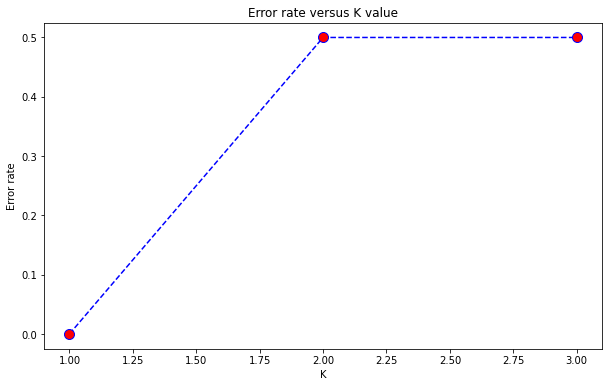

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,6))
plt.plot(range(1,4),error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error rate versus K value')
plt.xlabel('K')
plt.ylabel('Error rate')
print("min error:-", min(error_rate),"at K value:-", error_rate.index(min(error_rate)))

### Implementing KFold Crossvalidation

In [56]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score,KFold
from sklearn.linear_model import LogisticRegression

In [57]:
iris=load_iris()
X=iris.data
Y=iris.target
logreg=LogisticRegression()
kf=KFold(n_splits=5)

In [58]:
score=cross_val_score(logreg,X,Y,cv=kf)

/Users/snigdhakakkar/opt/anaconda2/envs/tf/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/snigdhakakkar/opt/anaconda2/envs/tf/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit

In [59]:
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [1.         1.         0.86666667 0.93333333 0.83333333]
Average Cross Validation score :0.9266666666666665


### Implementing Startified K Fold Cross validation

In [60]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.linear_model import LogisticRegression
iris=load_iris()
X=iris.data
Y=iris.target
logreg=LogisticRegression()
stratifiedkf=StratifiedKFold(n_splits=5)
score=cross_val_score(logreg,X,Y,cv=stratifiedkf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.96666667 1.         0.93333333 0.96666667 1.        ]
Average Cross Validation score :0.9733333333333334


/Users/snigdhakakkar/opt/anaconda2/envs/tf/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Implementing Monte Carlo Cross validation (shuffle split)

In [61]:
from sklearn.model_selection import ShuffleSplit,cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [62]:
logreg=LogisticRegression()
shuffle_split=ShuffleSplit(test_size=0.3,train_size=0.5,n_splits=10)

In [63]:
scores=cross_val_score(logreg,iris.data,iris.target,cv=shuffle_split)

/Users/snigdhakakkar/opt/anaconda2/envs/tf/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/snigdhakakkar/opt/anaconda2/envs/tf/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit

In [64]:
print("cross Validation scores:n {}".format(scores))
print("Average Cross Validation score :{}".format(scores.mean()))

cross Validation scores:n [0.97777778 0.95555556 0.97777778 0.95555556 0.91111111 0.93333333
 0.95555556 0.97777778 1.         0.97777778]
Average Cross Validation score :0.9622222222222222


### Implementing timeSeriesSplit

In [65]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit

In [66]:
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4, 5, 6])

time_series = TimeSeriesSplit()
print(time_series)

for train_index, test_index in time_series.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
TRAIN: [0] TEST: [1]
TRAIN: [0 1] TEST: [2]
TRAIN: [0 1 2] TEST: [3]
TRAIN: [0 1 2 3] TEST: [4]
TRAIN: [0 1 2 3 4] TEST: [5]


### Implementing SVM

##### sklearn.svm.SVC

Parameters:

Cfloat, default=1.0
Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’
Specifies the kernel type to be used in the algorithm. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape (n_samples, n_samples).

degreeint, default=3
Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.

gamma{‘scale’, ‘auto’} or float, default=’scale’
Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,
if ‘auto’, uses 1 / n_features.

coef0float, default=0.0
Independent term in kernel function. It is only significant in ‘poly’ and ‘sigmoid’.

class_weightdict or ‘balanced’, default=None
Set the parameter C of class i to class_weight[i]*C for SVC. If not given, all classes are supposed to have weight one. The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)).

decision_function_shape{‘ovo’, ‘ovr’}, default=’ovr’
Whether to return a one-vs-rest (‘ovr’) decision function of shape (n_samples, n_classes) as all other classifiers, or the original one-vs-one (‘ovo’) decision function of libsvm which has shape (n_samples, n_classes * (n_classes - 1) / 2). However, note that internally, one-vs-one (‘ovo’) is always used as a multi-class strategy to train models; an ovr matrix is only constructed from the ovo matrix. The parameter is ignored for binary classification.





In [68]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [69]:
X = np.array([[1,2], [2,3], [-1,2], [-2,-3]])
y = np.array([1,1,2,2])
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X,y)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [70]:
print(clf.predict([[-0.8,1]]))

[2]


In [73]:
print(clf.predict([[0.8,2]]))

[1]


In [74]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

n_samples, n_features = 10, 5
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

In [78]:
print(regr.predict([[0.3,0.4, 0.6, 1, 2.3]]))

[1.30303987]


### Implementing Decision Tree

##### sklearn.tree.DecisionTreeClassifier

Parameters:
    
criterion{“gini”, “entropy”, “log_loss”}, default=”gini”
The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “log_loss” and “entropy” both for the Shannon information gain, see Mathematical formulation.

splitter{“best”, “random”}, default=”best”
The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

max_depthint, default=None
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

min_samples_splitint or float, default=2
The minimum number of samples required to split an internal node:

If int, then consider min_samples_split as the minimum number.

If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.

min_samples_leafint or float, default=1
The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

If int, then consider min_samples_leaf as the minimum number.

If float, then min_samples_leaf is a fraction and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

max_featuresint, float or {“auto”, “sqrt”, “log2”}, default=None
The number of features to consider when looking for the best split:

If int, then consider max_features features at each split.

If float, then max_features is a fraction and int(max_features * n_features) features are considered at each split.

If “auto”, then max_features=sqrt(n_features).

If “sqrt”, then max_features=sqrt(n_features).

If “log2”, then max_features=log2(n_features).

If None, then max_features=n_features.

max_leaf_nodesint, default=None
Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

min_impurity_decreasefloat, default=0.0
A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

class_weightdict, list of dict or “balanced”, default=None
Weights associated with classes in the form {class_label: weight}. If None, all classes are supposed to have weight one. For multi-output problems, a list of dicts can be provided in the same order as the columns of y.

Note that for multioutput (including multilabel) weights should be defined for each class of every column in its own dict. For example, for four-class multilabel classification weights should be [{0: 1, 1: 1}, {0: 1, 1: 5}, {0: 1, 1: 1}, {0: 1, 1: 1}] instead of [{1:1}, {2:5}, {3:1}, {4:1}].

The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))

For multi-output, the weights of each column of y will be multiplied.

ccp_alphanon-negative float, default=0.0
Complexity parameter used for Minimal Cost-Complexity Pruning. The subtree with the largest cost complexity that is smaller than ccp_alpha will be chosen. By default, no pruning is performed.

In [79]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
iris = load_iris()
cross_val_score(clf, iris.data,iris.target,cv=10)

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.93333333, 1.        , 1.        , 1.        ])

### Total impurity of leaves vs effective alphas of pruned tree

In [80]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

In [81]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

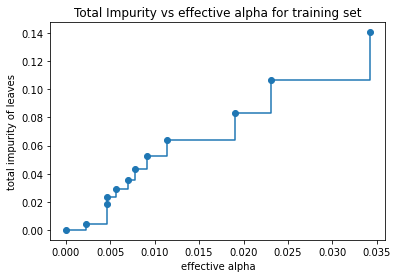

In [83]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [84]:
##train a decision tree using the effective alphas. 
##The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, 
##clfs[-1], with one node.

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("number of nodes in the last tree is: {} with ccp_alpha: {} ".format(clfs[-1].tree_.node_count,ccp_alphas[-1])
     )


number of nodes in the last tree is: 1 with ccp_alpha: 0.3272984419327777 


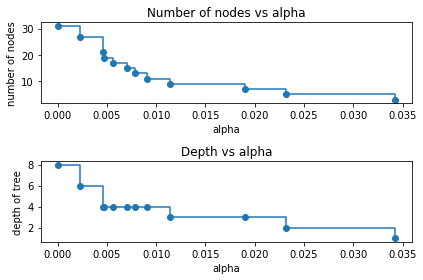

In [85]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

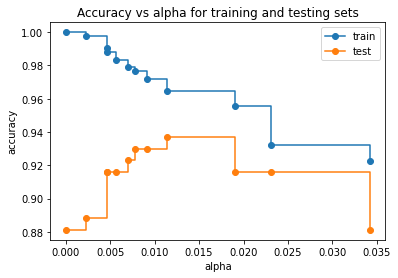

In [86]:
### Accuracy vs alpha for training and testing sets

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

##### sklearn.tree.DecisionTreeRegressor

Parameters:
    
criterion{“squared_error”, “friedman_mse”, “absolute_error”, “poisson”}, default=”squared_error”
The function to measure the quality of a split. Supported criteria are “squared_error” for the mean squared error, which is equal to variance reduction as feature selection criterion and minimizes the L2 loss using the mean of each terminal node, “friedman_mse”, which uses mean squared error with Friedman’s improvement score for potential splits, “absolute_error” for the mean absolute error, which minimizes the L1 loss using the median of each terminal node, and “poisson” which uses reduction in Poisson deviance to find splits.

In [91]:
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

X,y = load_boston(return_X_y=True)
rgr = DecisionTreeRegressor(random_state=0)
cross_val_score(rgr,X,y,cv=10 )

array([ 0.48141081,  0.60461936, -1.32633384,  0.54154398,  0.75705408,
        0.33934083,  0.18757206,  0.40679147, -1.9602183 , -0.32967889])

### Ensemble ML techniques

#### Bagging

##### sklearn.ensemble.BaggingClassifier

Parameters:
    
base_estimatorobject, default=None
The base estimator to fit on random subsets of the dataset. If None, then the base estimator is a DecisionTreeClassifier.

n_estimatorsint, default=10
The number of base estimators in the ensemble.

max_samplesint or float, default=1.0
The number of samples to draw from X to train each base estimator (with replacement by default, see bootstrap for more details).

If int, then draw max_samples samples.

If float, then draw max_samples * X.shape[0] samples.

max_featuresint or float, default=1.0
The number of features to draw from X to train each base estimator ( without replacement by default, see bootstrap_features for more details).

If int, then draw max_features features.

If float, then draw max_features * X.shape[1] features.

bootstrapbool, default=True
Whether samples are drawn with replacement. If False, sampling without replacement is performed.

bootstrap_featuresbool, default=False
Whether features are drawn with replacement.

oob_scorebool, default=False
Whether to use out-of-bag samples to estimate the generalization error. Only available if bootstrap=True.

In [92]:
### Bagging implementation
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier

In [93]:
X,y = make_classification(n_samples = 100, n_features=4, n_informative=2, n_redundant=0, shuffle=False, random_state=0)

In [94]:
clf= BaggingClassifier(base_estimator=SVC(), n_estimators=10, random_state=0).fit(X,y)

In [95]:
clf.predict([[0.2,0.3,0.4,0.8]])

array([1])

#### Random Forest Implementation

##### sklearn.ensemble.RandomForestClassifier

class sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

In [98]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

X,y = make_classification(n_samples = 100, n_features=4, n_informative=2, 
                          n_redundant=0, shuffle=False, random_state=0)

clf = RandomForestClassifier(n_estimators=10,max_depth=2, random_state=0).fit(X,y)
clf.predict([[0.2,0.3,0.4,0.8]])

array([1])

##### sklearn.ensemble.RandomForestRegressor

class sklearn.ensemble.RandomForestRegressor(n_estimators=100, *, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)

In [99]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
X, y = make_regression(n_features=4, n_informative=2,
                      random_state=0, shuffle=False)
regr = RandomForestRegressor(max_depth=2, random_state=0).fit(X, y)


In [100]:
print(regr.predict([[0, 0, 0, 0]]))

[-8.32987858]
